In [1]:
import numpy as np
import caffe

caffe_root = './'  # this file is expected to be in {caffe_root}

In [2]:
caffe.set_mode_cpu()
net = caffe.Net(caffe_root + 'models/e56253735ef32c3c296d/train_val_mod.prototxt',
                caffe_root + 'models/e56253735ef32c3c296d/cifar10_nin.caffemodel',
                caffe.TEST)

In [3]:
import copy

W = {}
b = {}
for lyr in net.params:
    W[lyr] = copy.deepcopy(net.params[lyr][0].data)
    b[lyr] = copy.deepcopy(net.params[lyr][1].data)

In [4]:
from nnS_lib import *
step = 0.1
P = np.arange(0, 1 + step/2, step)

Acc = []
for p in P:
    print p, 
    for lyr in net.params:
        net.params[lyr][0].data[...] = dropLow(W[lyr], p)
        #    net.params[lyr][1].data[...] = dropLow(b[lyr], p)
    acc = []
    for i in range(100):
        temp = net.forward()['accuracy']
        acc.append(float(temp))
    Acc_p = np.mean(np.asarray(acc))
    Acc.append(Acc_p)
    print Acc_p

0.0 0.895599999428
0.1 0.881499999166
0.2 0.87289999865
0.3 0.873999996632
0.4 0.868499998972
0.5 0.862299999297
0.6 0.795399997085
0.7 0.719100000262
0.8 0.285800000653
0.9 0.116099999472
1.0 0.100000000149


(0, 1)

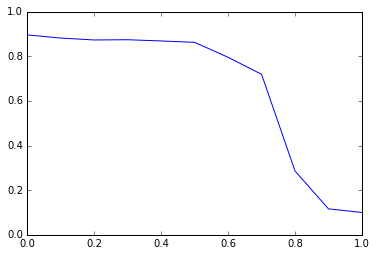

In [8]:
import matplotlib.pyplot as plt, mpld3

%matplotlib inline
# mpld3.enable_notebook()
# mpld3.disable_notebook()
plt.figure()
plt.plot(P, Acc)
plt.ylim([0,1])